([<matplotlib.axis.YTick at 0x7f86f5290580>,
 [Text(0, 0.0, '0.0'), Text(0, 0.5, '0.5'), Text(0, 1.0, '1.0')])

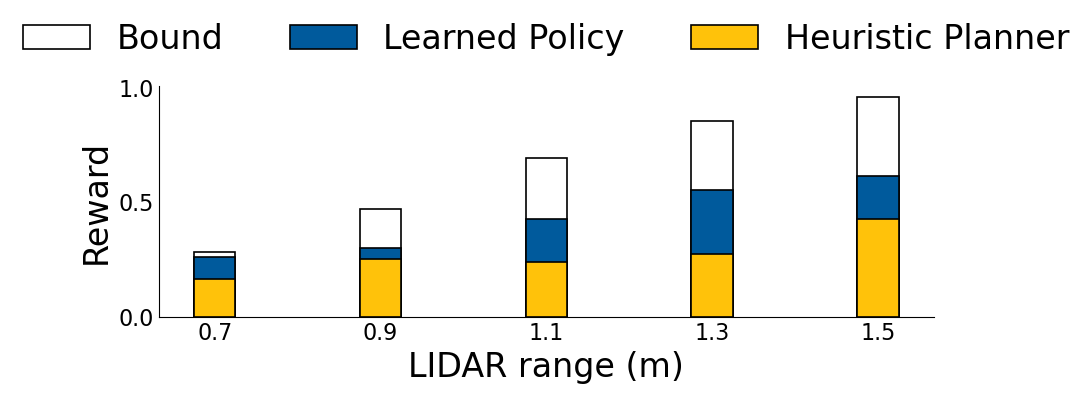

In [4]:
import numpy as np
import IPython as ipy
import matplotlib.pyplot as plt
import matplotlib.cm as cm


################## Load data ###############################
data = np.load("results_range.npz")
ranges = data['ranges']
bounds = data['bounds']
bounds_fano = data['bounds_fano']
bounds_pinsker = data['bounds_pinsker']
test_rewards_learning_all = data['test_rewards_learning_all']
test_rewards_planning_all = data['test_rewards_planning_all']

# Rewards from learning
test_rewards_learning_max = np.zeros(len(ranges))
test_rewards_learning_mean = np.zeros(len(ranges))
test_rewards_learning_std_dev = np.zeros(len(ranges))
for i in range(len(ranges)):
	test_rewards_learning_i = test_rewards_learning_all[i]
	test_rewards_learning_max[i] = np.max(test_rewards_learning_i)
	test_rewards_learning_mean[i] = np.mean(test_rewards_learning_i)
	test_rewards_learning_std_dev[i] = np.std(test_rewards_learning_i)

# Rewards from planning
test_rewards_planning = test_rewards_planning_all


    
################## Make plot ###############################
# Plot
plt.rcParams["figure.figsize"] = (10,3)
# plt.rcParams["figure.dpi"] = 200
# plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = '16'

fig, ax = plt.subplots()
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)


colors = ['none', '#005a9c', '#FFC20A']

bar_width = 0.05

ax.bar(ranges, bounds, bar_width, edgecolor = "k", linewidth = 1.2, color=colors[0],label = "Bound")
ax.bar(ranges, test_rewards_learning_mean, bar_width, edgecolor = "k", linewidth = 1.2, color=colors[1],label = 'Learned Policy')
ax.bar(ranges, test_rewards_planning, bar_width, edgecolor = "k", linewidth = 1.2, color=colors[2],label = 'Heuristic Planner')

ax.legend(bbox_to_anchor=(0.5,1), loc = 'lower center', edgecolor = 'white', ncol = 3, fontsize=24)


plt.xlabel("LIDAR range (m)",fontsize = 24)
plt.ylabel('Reward',fontname = 'Dejavu Sans', fontsize = 24)
plt.xticks(ranges)
plt.yticks([0.0, 0.5, 1.0])